In [1]:
pip install opencv-python pillow

   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.0 MB ? eta -:--:--
    --------------------------------------- 0.5/39.0 MB 816.5 kB/s eta 0:00:48
    --------------------------------------- 0.5/39.0 MB 816.5 kB/s eta 0:00:48
    --------------------------------------- 0.5/39.0 MB 816.5 kB/s eta 0:00:48
    --------------------------------------- 0.8/39.0 MB 644.0 kB/s eta 0:01:00
   - -------------------------------------- 1.3/39.0 MB 932.0 kB/s eta 0:00:41
   - -------------------------------------- 1

# 1. Load and View a Grayscale Image

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
img_pil = Image.open('images.jpg')
print(f"PIL Image Format : {img_pil.format}, size : {img_pil.size}, mode : {img_pil.mode}")

PIL Image Format : JPEG, size : (183, 275), mode : RGB


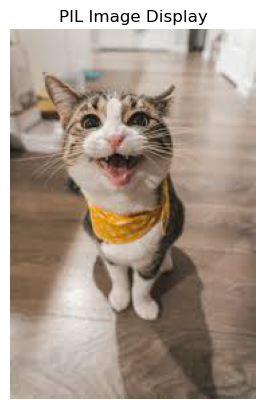

In [5]:
plt.imshow(img_pil)
plt.title('PIL Image Display')
plt.axis('off')  # Hide axes becase I dont want it to show me as a number
plt.show()

In [6]:
import cv2

In [7]:
img_cv = cv2.imread('images.jpg')

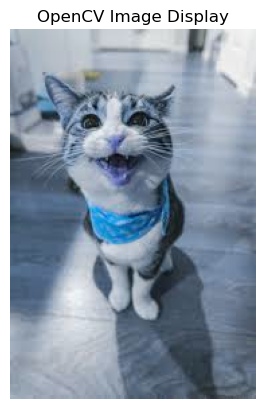

In [8]:
plt.imshow(img_cv)
plt.title('OpenCV Image Display')
plt.axis('off')  # Hide axes
plt.show()

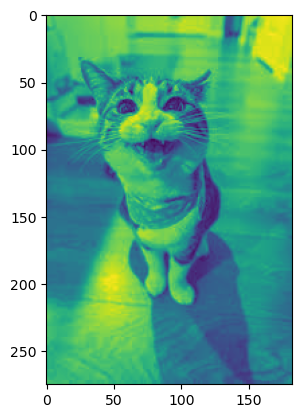

In [9]:
img_pil =img_pil.convert('L')
plt.imshow(img_pil)

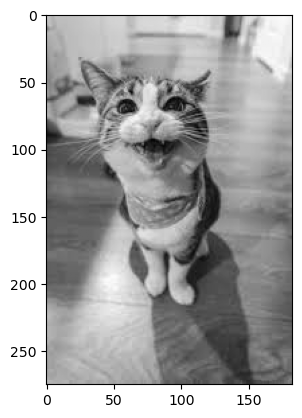

In [10]:
img_cv = cv2.imread('images.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_cv, cmap='gray')

In [14]:
img_cv.shape

(275, 183)

In [15]:
img_cv.dtype

dtype('uint8')

In [16]:
img_cv.min()

np.uint8(10)

In [17]:
img_cv.max()

np.uint8(248)

# 2. Brighten the Image

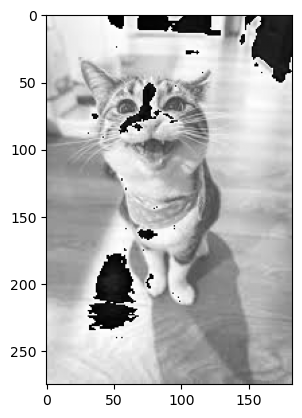

In [71]:
bright = img_cv + 50
plt.imshow(bright ,cmap='gray')

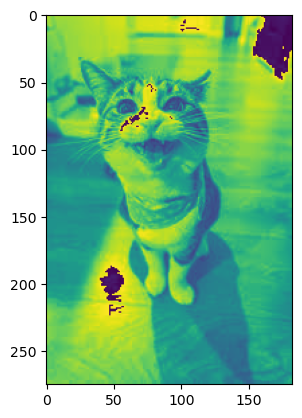

In [22]:
bright = img_cv + 30
plt.imshow(bright)

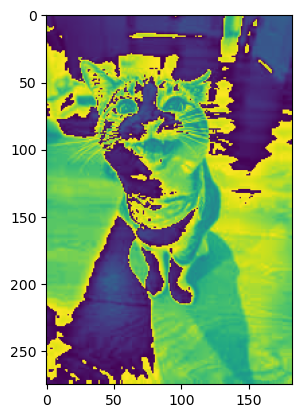

In [23]:
bright = img_cv + 89
plt.imshow(bright)

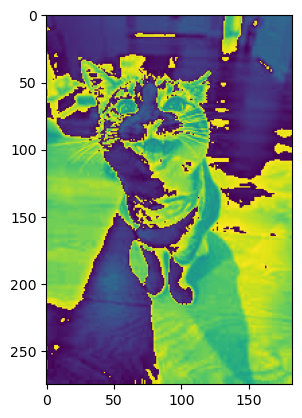

In [24]:
bright = img_cv + 100
plt.imshow(bright)

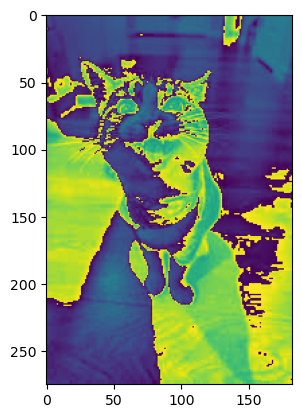

In [25]:
bright = img_cv + 120
plt.imshow(bright)

# 3. Add a Higher Value

In [26]:
bright = img_cv + 300
plt.imshow(bright)

OverflowError: Python integer 300 out of bounds for uint8

# 3. Add a Higher Value wiht np.clip

In [14]:
import numpy as np

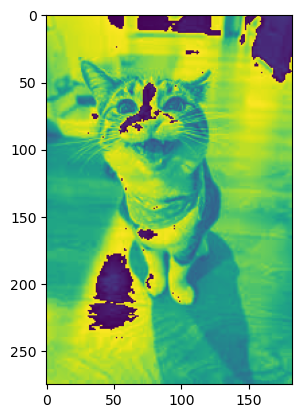

In [30]:
bright_clip = np.clip(img_cv + 50, 0, 255).astype(np.uint8)
plt.imshow(bright_clip)

In [32]:
bright.min()

np.uint8(0)

In [33]:
bright.max()

np.uint8(255)

In [34]:
 bright_clip.min()

np.uint8(0)

In [35]:
bright_clip.max()

np.uint8(255)

In [39]:
bright_clip = np.clip(img_cv + 300, 0, 255).astype(np.uint8)
plt.imshow(bright_clip)

OverflowError: Python integer 300 out of bounds for uint8

it dosnt work becus the uint8 is from 0 to 255 and 300 is out of range 

## I tried to change the Type 

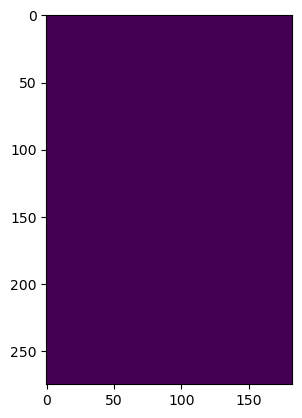

In [41]:
tmp = img_cv.astype(np.int16) + 300
bright_clip = np.clip(tmp, 0, 255).astype(np.uint8)
plt.imshow(bright_clip)

## 4. Subtract to Darken

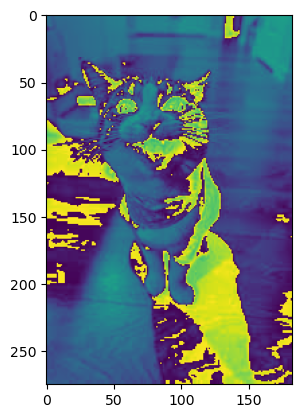

In [43]:
dark = img_cv - 100
plt.imshow(dark)

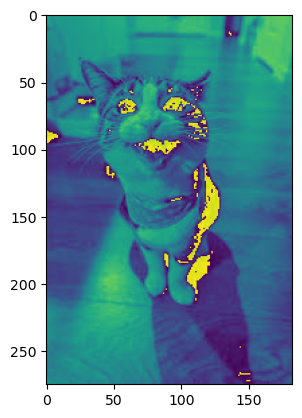

In [44]:
dark = img_cv - 50
plt.imshow(dark)

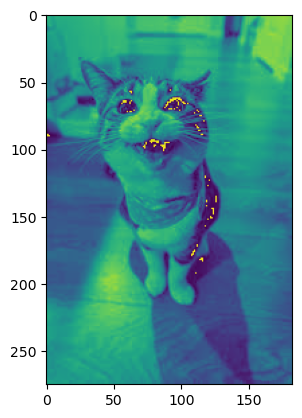

In [45]:
dark = img_cv - 30
plt.imshow(dark)

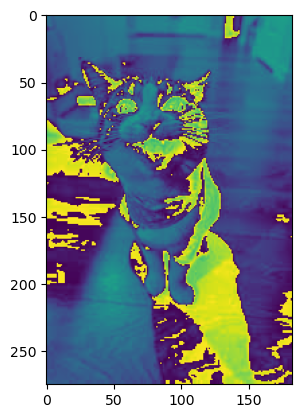

In [46]:
dark = img_cv - 100
plt.imshow(dark)

In [47]:
dark.max()

np.uint8(255)

In [48]:
dark.min()

np.uint8(0)

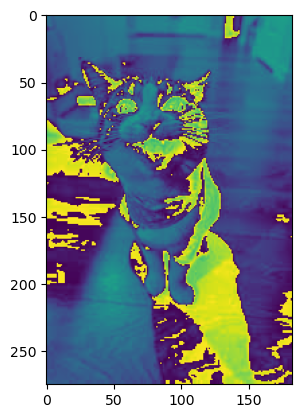

In [50]:
dark_clip = np.clip(img_cv - 100, 0, 255).astype(np.uint8)
plt.imshow(dark_clip)

In [51]:
dark_clip.max()

np.uint8(255)

In [52]:
dark_clip.min()

np.uint8(0)

## 5. Transpose the Image

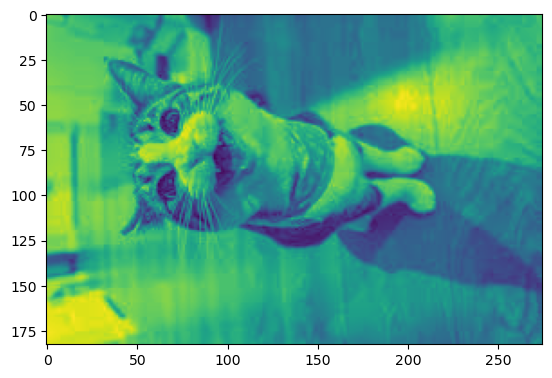

In [53]:
img_T = img_cv.T
plt.imshow(img_T)

## 6. Flip the Image Horizontally and Vertically

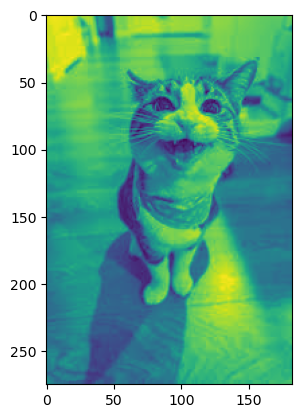

In [55]:
flipped_lr = np.fliplr(img_cv)
plt.imshow(flipped_lr)

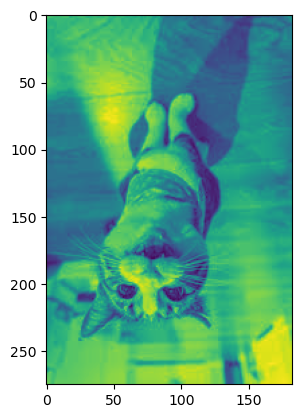

In [57]:
flipped_ud = np.flipud(img_cv)
plt.imshow(flipped_ud)

## 7. Slice (Crop) a Section of the Image

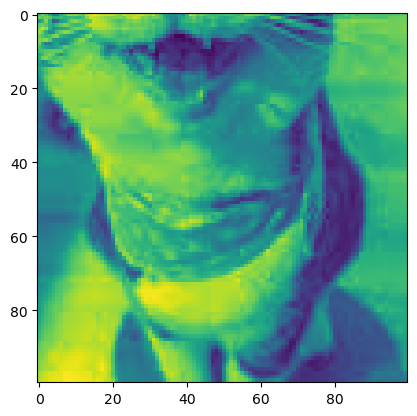

In [12]:
h, w = img_cv.shape
ch, cw = h//2, w//2
patch = img_cv[ch-50:ch+50, cw-50:cw+50]
plt.imshow(patch)

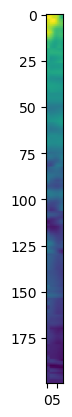

In [60]:
h, w = img_cv.shape
ch, cw = h//2, w//2
patch = img_cv[ch-100:ch+100, cw-100:cw+100]
plt.imshow(patch)

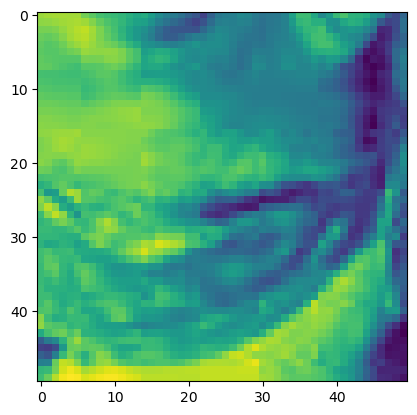

In [61]:
h, w = img_cv.shape
ch, cw = h//2, w//2
patch = img_cv[ch-25:ch+25, cw-25:cw+25]
plt.imshow(patch)

## 8. Create a Negative Image

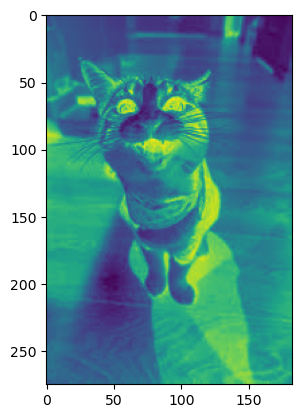

In [62]:
neg = 255 - img_cv
plt.imshow(neg)

## 9. Rotate the Image

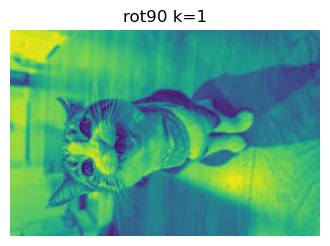

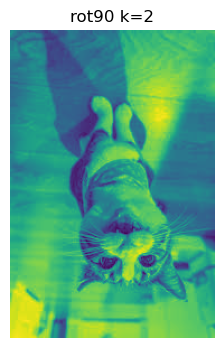

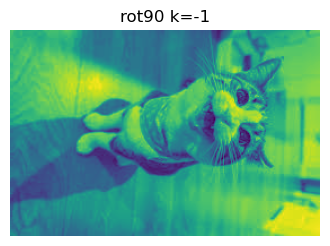

In [64]:
for k in [1, 2, -1]:
    plt.figure(figsize=(4,4))
    plt.imshow(np.rot90(img_cv, k=k))
    plt.title(f'rot90 k={k}')
    plt.axis('off')
    plt.show()

## 10. Combine Multiple Transformations

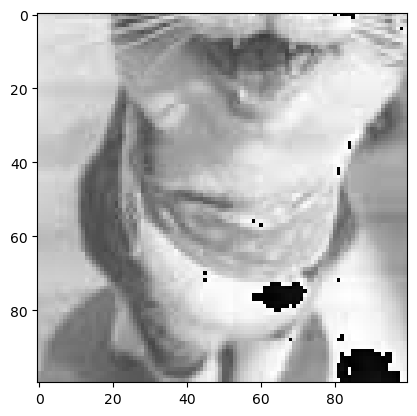

In [15]:
combo = img_cv[ch-50:ch+50, cw-50:cw+50]                
combo = np.fliplr(combo)                             
combo = np.clip(combo + 50, 0, 255).astype(np.uint8)  
plt.imshow(combo, cmap='gray')

## Bonus

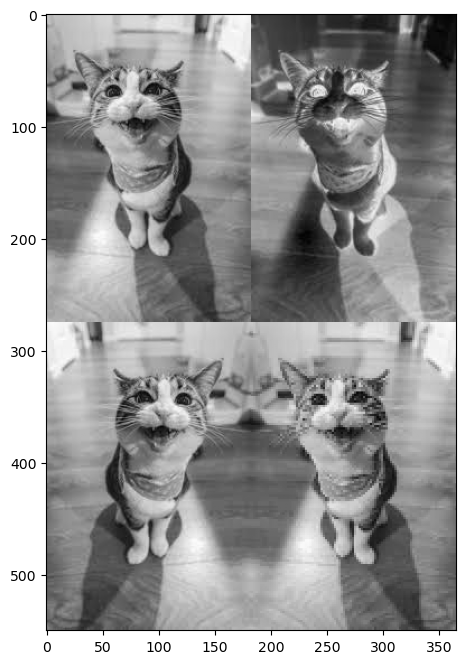

In [19]:
h, w = img_cv.shape
down = img_cv[::2, ::2]
down_up = cv2.resize(down, (w, h), interpolation=cv2.INTER_NEAREST)
row2 = np.hstack([np.fliplr(img_cv), down_up])
row1   = np.hstack([img_cv, 255 - img_cv])
collage = np.vstack([row1, row2])
plt.figure(figsize=(8,8))
plt.imshow(collage, cmap='gray')